In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [26]:
df = df.drop_duplicates()

In [27]:
import seaborn as sns

sns.pairplot(df)

In [28]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [29]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [30]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
import matplotlib.pyplot as plt

No     5174
Yes    1869
Name: Churn, dtype: int64


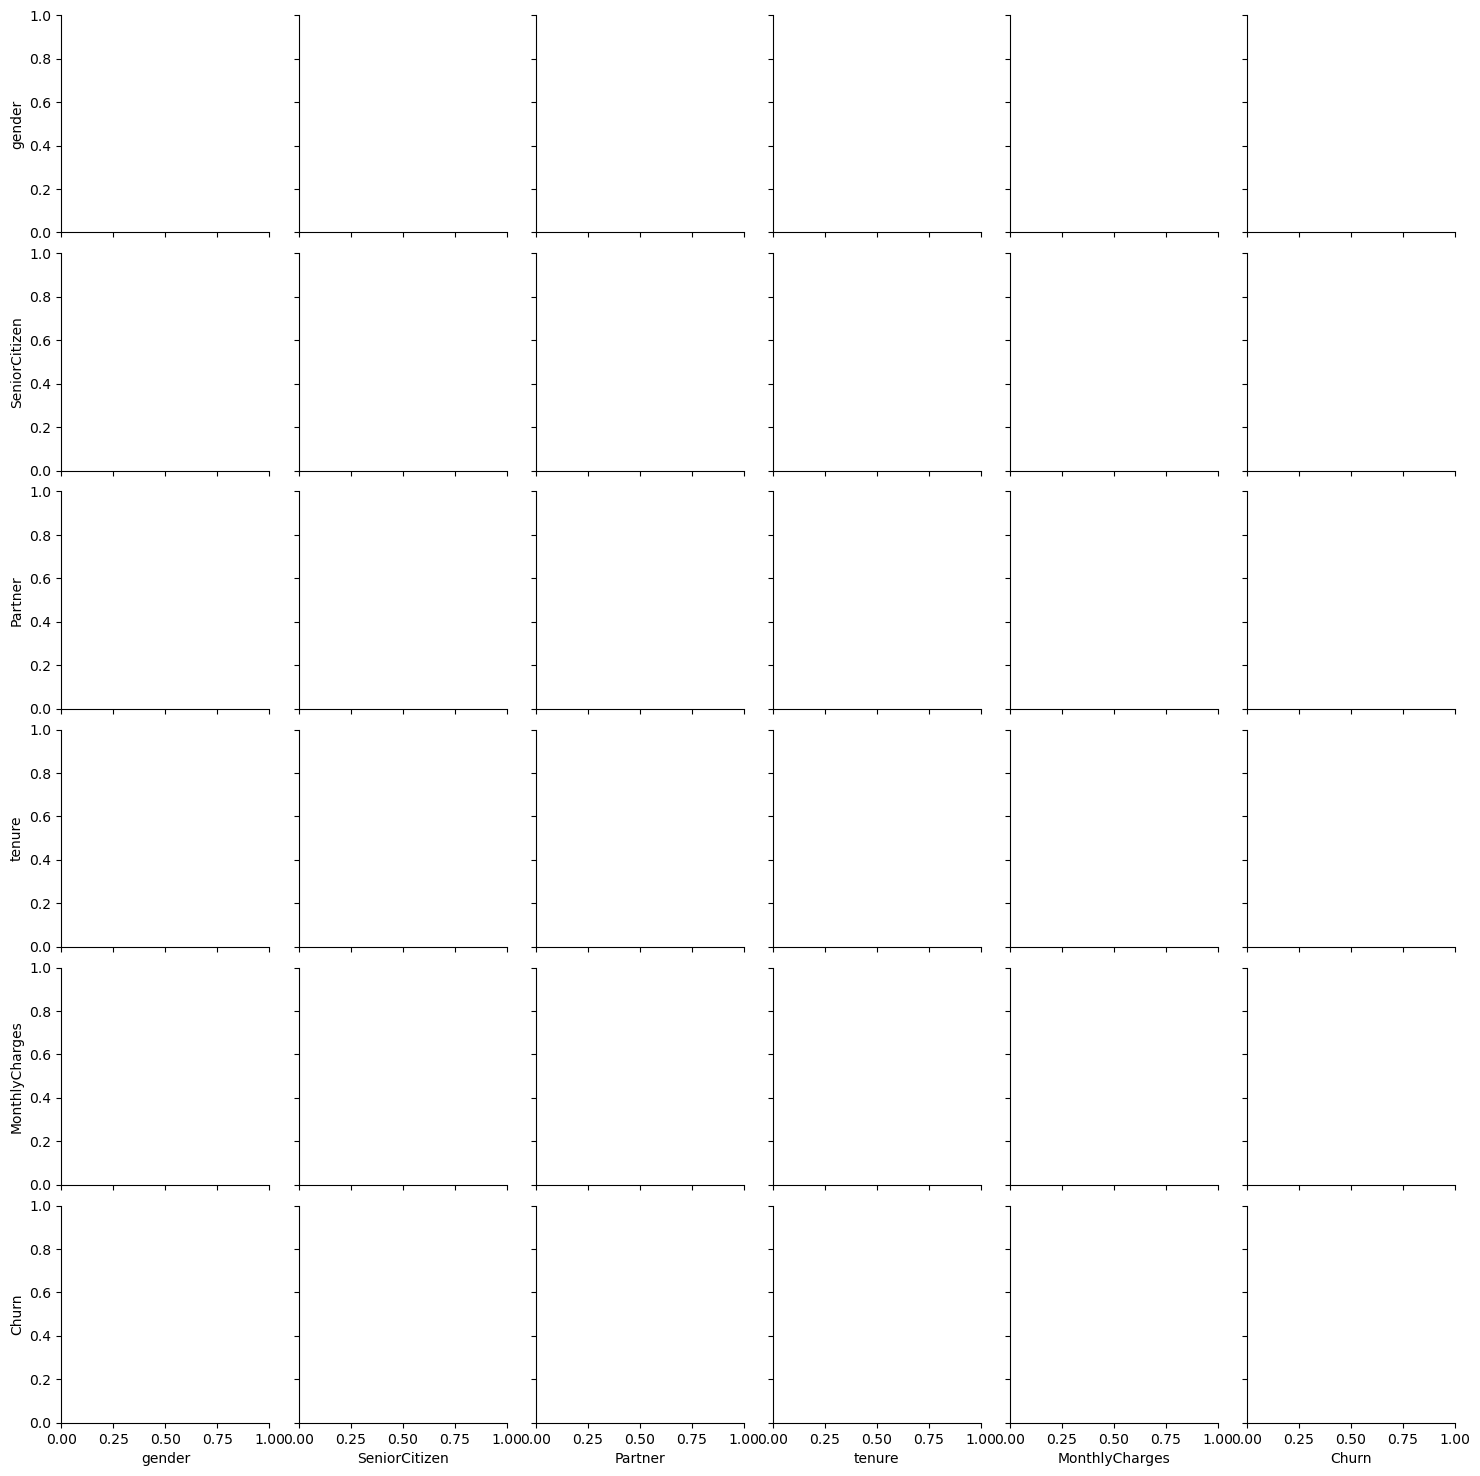

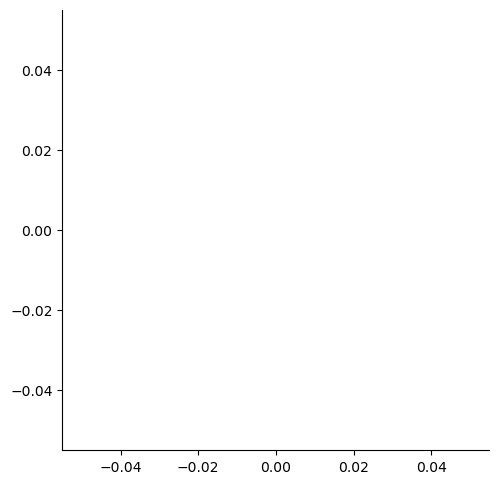

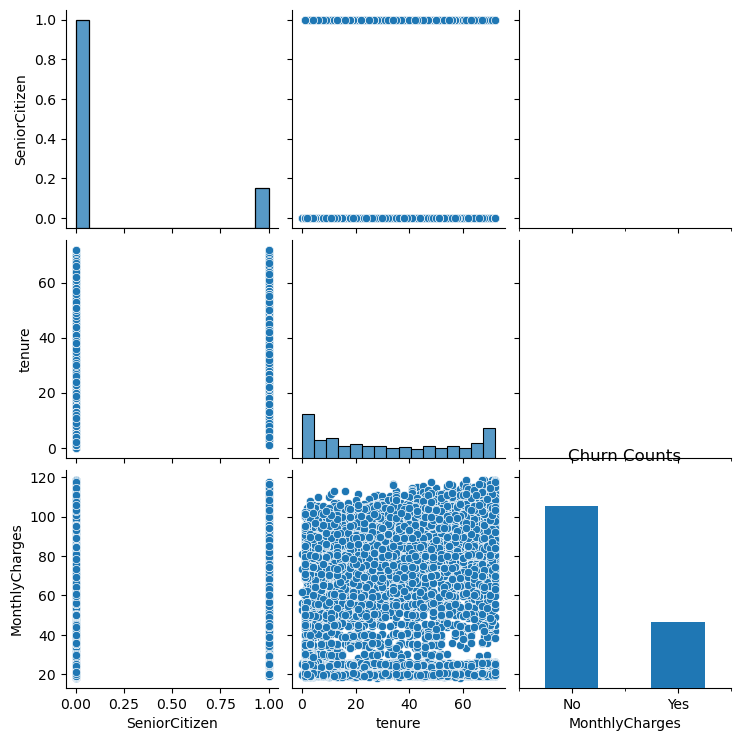

In [34]:


# create a bar chart to show the count of "Churn"
churn_counts = df['Churn'].value_counts()
churn_counts.plot(kind='bar')
print(churn_counts)

# set the title and axis labels
plt.title("Churn Counts")
plt.xlabel("Churn")
plt.ylabel("Count")

# display the chart
plt.show()

In [35]:
from sklearn.utils import resample#subclass utils,skit learn library,importing the resample (is the main function) 


# Separate the data into two dataframes based on production_class
df_class1 = df[df['Churn'] == 'Yes']
df_class0 = df[df['Churn'] == 'No']

# Upsample the minority class (class 1)
df_class1_upsampled = resample(df_class0, replace=True, n_samples=len(df_class1), random_state=42)

# Combine the upsampled dataframe with the original majority class dataframe
df_upsampled = pd.concat([df_class1_upsampled, df_class1])

# Print the upsampled dataframe
print(df_upsampled)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1162  9359-UGBTK  Female              0      No         No      67   
5115  6374-AFWOX    Male              0     Yes         No      46   
4193  2428-ZMCTB    Male              0      No         No      10   
617   7134-MJPDY  Female              1      No         No      66   
6015  2325-NBPZG  Female              0      No         No       3   
...          ...     ...            ...     ...        ...     ...   
7021  1699-HPSBG    Male              0      No         No      12   
7026  8775-CEBBJ  Female              0      No         No       9   
7032  6894-LFHLY    Male              1      No         No       1   
7034  0639-TSIQW  Female              0      No         No      67   
7041  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
1162          Yes            No             DSL                  Yes  ...   
5115 

In [36]:
df=df_upsampled.copy()

No     1869
Yes    1869
Name: Churn, dtype: int64


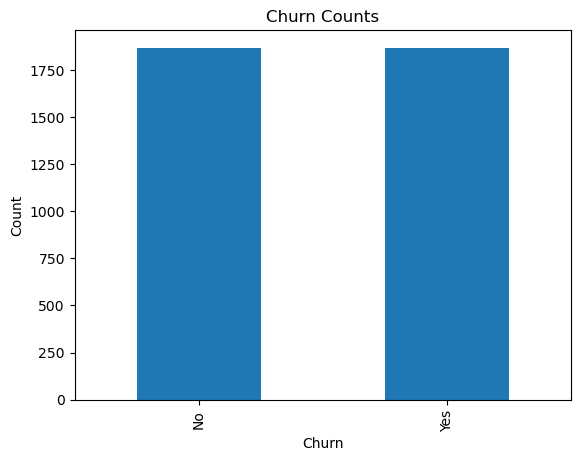

In [37]:
# create a bar chart to show the count of "Churn"
churn_counts = df['Churn'].value_counts()
churn_counts.plot(kind='bar')
print(churn_counts)

# set the title and axis labels
plt.title("Churn Counts")
plt.xlabel("Churn")
plt.ylabel("Count")

# display the chart
plt.show()

In [38]:
# Define the mapping dictionary
mapping = {'Yes': 1, 'No': 0}

# Map the values in the 'churn' column to 0 and 1 using the dictionary
df['Churn'] = df['Churn'].map(mapping)

In [39]:
# Define the mapping dictionary
mapping = {'Yes': 1, 'No': 0}

# Map the values in the 'churn' column to 0 and 1 using the dictionary
df['Partner'] = df['Partner'].map(mapping)

In [40]:
# Define the mapping dictionary
mapping = {'Male': 1, 'Female': 0}

# Map the values in the 'churn' column to 0 and 1 using the dictionary
df['gender'] = df['gender'].map(mapping)

In [41]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [43]:
df = df.drop_duplicates(subset=["Churn", "MonthlyCharges"])

In [44]:
sns.relplot(data=df, x="Churn", y="MonthlyCharges", kind="line")



In [45]:
corr_prob = df['MonthlyCharges'].corr(df['Churn'])

In [46]:
print(corr_prob)

0.056408172541409805


In [47]:

#INSIGHT
#As the monthly charges increases the churn is high .
#Monthly charge is the key Feature

In [48]:
# Select only the string columns
string_cols = df.select_dtypes(include=['object'])

# Loop over each string column
for col in string_cols:
    # Get the unique string values in the column
    unique_vals = df[col].unique()
    
    # Create a dictionary mapping each unique string value to a numerical value
    val_dict = {val: i for i, val in enumerate(unique_vals)}
    
    # Replace the string values in the column with their corresponding numerical values
    df[col] = df[col].replace(val_dict)

C:\Users\Syed Yasir Hussain\AppData\Local\Temp\ipykernel_19016\472274116.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(val_dict)


In [49]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1162,0,0,0,0,0,67,0,0,0,0,...,0,0,0,0,0,0,0,72.35,0,0
5115,1,1,0,1,0,46,0,0,0,0,...,0,0,0,1,1,1,1,65.65,1,0
4193,2,1,0,0,0,10,0,0,1,1,...,1,1,1,2,2,1,2,19.75,2,0
617,3,0,1,0,0,66,0,1,2,2,...,0,0,2,0,0,0,2,102.85,3,0
6015,4,0,0,0,0,3,0,0,2,0,...,2,2,0,1,2,0,3,74.55,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,1752,0,1,1,0,50,0,1,2,2,...,2,2,2,1,2,0,3,88.05,1726,1
6996,1753,0,0,1,1,41,0,0,0,2,...,2,0,0,0,0,0,0,66.50,1727,1
7011,1754,0,0,0,0,4,0,0,0,0,...,2,0,0,1,2,0,1,60.40,1728,1
7021,1755,1,0,0,0,12,0,0,0,2,...,2,0,2,1,0,0,3,59.80,1729,1


In [50]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
#import pandas as pd
#df = pd.get_dummies(df)#ONE HOT N CODING

In [52]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Select the threshold correlation value
threshold = 0.2

# Identify the columns to remove
cols_to_remove = []
for col in corr_matrix.columns:
    if abs(corr_matrix[col]['Churn']) < threshold:
        cols_to_remove.append(col)

# Remove the columns from the DataFrame
df = df.drop(cols_to_remove, axis=1)

In [53]:
print(df)

      customerID  tenure  OnlineSecurity  OnlineBackup  TechSupport  Contract  \
1162           0      67               0             0            0         0   
5115           1      46               0             1            0         1   
4193           2      10               1             2            1         2   
617            3      66               2             0            0         0   
6015           4       3               0             0            2         2   
...          ...     ...             ...           ...          ...       ...   
6993        1752      50               2             1            2         2   
6996        1753      41               2             1            0         0   
7011        1754       4               0             1            0         2   
7021        1755      12               2             0            0         0   
7026        1756       9               2             0            2         2   

      PaymentMethod  TotalC

In [54]:
df.head()

,customerID,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod,TotalCharges,Churn
1162,0,67,0,0,0,0,0,0,0
5115,1,46,0,1,0,1,1,1,0
4193,2,10,1,2,1,2,2,2,0
617,3,66,2,0,0,0,2,3,0
6015,4,3,0,0,2,2,3,4,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1757 entries, 1162 to 7026
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customerID      1757 non-null   int64
 1   tenure          1757 non-null   int64
 2   OnlineSecurity  1757 non-null   int64
 3   OnlineBackup    1757 non-null   int64
 4   TechSupport     1757 non-null   int64
 5   Contract        1757 non-null   int64
 6   PaymentMethod   1757 non-null   int64
 7   TotalCharges    1757 non-null   int64
 8   Churn           1757 non-null   int64
dtypes: int64(9)
memory usage: 201.8 KB


In [56]:
new_df = df.drop('Churn',axis=1)


In [61]:
#new_df = df.drop('production', axis=1)
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# apply PCA with 2 components
pca = PCA(n_components=4)
pca_components = pca.fit_transform(new_df)

# create a new dataframe with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10'])
# concatenate the PCA components with the categorical column 'Gender'
#final_df = pd.concat([pca_df], axis=1)

print(pca_df)


             PCA1      PCA2       PCA3      PCA4
0    -1229.832859 -4.490720  23.271928  1.484158
1    -1228.172317 -3.714522   2.293299  0.853574
2    -1226.335460 -2.376629 -33.692040  0.005059
3    -1225.577644 -4.483989  22.282021 -0.832128
4    -1223.424709 -2.134700 -40.673176 -1.006941
...           ...       ...        ...       ...
1752  1229.585449 -3.841995  35.054911 -1.371259
1753  1231.102899 -3.518377  26.161038  2.229108
1754  1232.950711 -2.142433 -10.799845  2.093819
1755  1234.271876 -2.452634  -2.805685 -0.240088
1756  1235.721344 -2.350158  -5.817922  1.969391

[1757 rows x 4 columns]


In [62]:
pr=df['Churn'].tolist()

In [63]:
print(pr)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [64]:
pca_df['Churn']=pr

In [65]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA1    1757 non-null   float64
 1   PCA2    1757 non-null   float64
 2   PCA3    1757 non-null   float64
 3   PCA4    1757 non-null   float64
 4   Churn   1757 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 68.8 KB


In [66]:
df=pca_df.copy()

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
from sklearn.model_selection import train_test_split
df=df.dropna()

#print(df)
# Split the dataset into training (60%), testing (20%), and validation (20%) sets
train_df, test_df = train_test_split(df, test_size=0.30, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)

#print(test_df)
# Split the data into input (X) and output (y) columns
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']

X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']


X_val = val_df.drop('Churn', axis=1)
y_val = val_df['Churn']


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf.predict(X_val)

# Evaluate the model on the validation set using accuracy score, confusion matrix, and classification report
accuracy = accuracy_score(y_val, y_val_pred)
confusion = confusion_matrix(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 1.00
Confusion Matrix:
[[138   1]
 [  0 125]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       139
           1       0.99      1.00      1.00       125

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



In [76]:
  import pickle


# Save the model to a file using pickle
with open('randomforest.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Load the model from the file using pickle
with open('randomforest.pkl', 'rb') as f:
    model = pickle.load(f)

In [83]:
df.columns

Index(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'Churn'], dtype='object')

In [84]:
columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 
           'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
           'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
inputs = []
for column in columns:
    user_input = input(f"Enter value for {column}: ")
    inputs.append(user_input)

print(inputs)


Enter value for customerID: 1
Enter value for gender: 1
Enter value for SeniorCitizen: 1
Enter value for Partner: 1
Enter value for Dependents: 1
Enter value for tenure: 1
Enter value for PhoneService: 1
Enter value for MultipleLines: 1
Enter value for InternetService: 1
Enter value for OnlineSecurity: 1
Enter value for OnlineBackup: 1
Enter value for DeviceProtection: 1
Enter value for TechSupport: 1
Enter value for StreamingTV: 1
Enter value for StreamingMovies: 1
Enter value for Contract: 1
Enter value for PaperlessBilling: 1
Enter value for PaymentMethod: 1
Enter value for MonthlyCharges: 1
Enter value for TotalCharges: 1
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


In [85]:
# # Convert the list to a DataFrame with a single row and 20 columns
new_data = pd.DataFrame([inputs], columns=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'])
print(new_data)
new_data = pd.concat([new_data] * 1000, ignore_index=True)
print(new_data.head())
# Apply the same PCA transformation to the new input data
pca = PCA(n_components=4) # use the same PCA parameters as before
new_data_transformed = pca.fit_transform(new_data)


# Make predictions on the transformed data using your trained model
predictions = rf.predict(new_data_transformed)

  customerID gender SeniorCitizen Partner Dependents tenure PhoneService  \
0          1      1             1       1          1      1            1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0             1               1              1            1                1   

  TechSupport StreamingTV StreamingMovies Contract PaperlessBilling  \
0           1           1               1        1                1   

  PaymentMethod MonthlyCharges TotalCharges  
0             1              1            1  
  customerID gender SeniorCitizen Partner Dependents tenure PhoneService  \
0          1      1             1       1          1      1            1   
1          1      1             1       1          1      1            1   
2          1      1             1       1          1      1            1   
3          1      1             1       1          1      1            1   
4          1      1             1       1          1      1            

C:\Users\Syed Yasir Hussain\Suha\lib\site-packages\sklearn\decomposition\_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
C:\Users\Syed Yasir Hussain\Suha\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [86]:
print(predictions[0])

1
